In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy.units as u
import astropy.coordinates as coord

In [2]:
path0 = '/ocean/projects/phy210068p/hsu1/Ananke_datasets_training/BPRP_spec/stellar_params_catalog_00.h5'
path1 = '/ocean/projects/phy210068p/hsu1/Ananke_datasets_training/BPRP_spec/stellar_params_catalog_01.h5'
path2 = '/ocean/projects/phy210068p/hsu1/Ananke_datasets_training/BPRP_spec/stellar_params_catalog_02.h5'
path3 = '/ocean/projects/phy210068p/hsu1/Ananke_datasets_training/BPRP_spec/stellar_params_catalog_03.h5'
path4 = '/ocean/projects/phy210068p/hsu1/Ananke_datasets_training/BPRP_spec/stellar_params_catalog_04.h5'
path5 = '/ocean/projects/phy210068p/hsu1/Ananke_datasets_training/BPRP_spec/stellar_params_catalog_05.h5'
path6 = '/ocean/projects/phy210068p/hsu1/Ananke_datasets_training/BPRP_spec/stellar_params_catalog_06.h5'
path7 = '/ocean/projects/phy210068p/hsu1/Ananke_datasets_training/BPRP_spec/stellar_params_catalog_07.h5'
path8 = '/ocean/projects/phy210068p/hsu1/Ananke_datasets_training/BPRP_spec/stellar_params_catalog_08.h5'
path9 = '/ocean/projects/phy210068p/hsu1/Ananke_datasets_training/BPRP_spec/stellar_params_catalog_09.h5'

In [3]:
files = [path0, path1, path2, path3, path4, path5, path6, path7, path8, path9]
feh = []
BPRP_id = []
for i in range(len(files)):
    with h5py.File(files[i], 'r') as f:
        feh = np.append(feh, f['stellar_params_est'][:,1])
        b_id = np.array(f['gdr3_source_id'][:], dtype=np.int64)
        BPRP_id = np.append(BPRP_id, b_id)

In [5]:
# path = '/ocean/projects/phy210068p/hsu1/Ananke_datasets_training/GaiaDR3_data_reduced.hdf5'
# path_out = '/work2/08949/tg882489/stampede2/data/Ananke/GaiaDR3_data_reduced.hdf5'
# df = pd.read_hdf(path)
# main_source_id = np.array(df.source_id, dtype=np.int64)
# parallax = df.parallax
# parallax_error = df.parallax_error
# poe = parallax/parallax_error
# ra = df.ra
# dec = df.dec
# pmra = df.pmra
# pmdec = df.pmdec
# rv = df.radial_velocity


In [7]:
path = '/ocean/projects/phy210068p/hsu1/Ananke_datasets_training/GaiaDR3_data_reduced.hdf5'
with h5py.File(path, 'r') as f:
    ra = f['ra'][:]
    dec = f['dec'][:]
    parallax = f['parallax'][:]
    pmra = f['pmra'][:]
    pmdec = f['pmdec'][:]
    rv = f['radial_velocity'][:]
    main_source_id = f['source_id'][:]

In [8]:
gaia_df = pd.DataFrame(
    {
        #sort based on id
        'main_source_id': main_source_id,
        'parallax': parallax,
        'ra': ra,
        'dec': dec,
        'pmra': pmra,
        'pmdec': pmdec,
        'rv': rv
    },
#     index= main_source_id,
)

In [9]:
BPRP_df = pd.DataFrame(
    {
        'feh': feh,
        'BPRP_id': BPRP_id
    },
#     index=BPRP_id,
)

In [7]:
# gaia_100_df = gaia_df.head(10000)
# BPRP_100_df = BPRP_df.head(10000)

In [10]:
merged_df = gaia_df.merge(BPRP_df, left_on='main_source_id', right_on='BPRP_id')

In [12]:
merged_df, merged_df.feh.shape, ra.shape, merged_df.ra.shape

(          main_source_id  parallax          ra        dec      pmra     pmdec  \
 0           4.267993e+18  0.798789  288.687043   2.679046 -2.727043  1.258720   
 1           4.268039e+18  0.390881  287.617196   2.287493 -1.487731 -2.798644   
 2           4.267993e+18  1.252686  288.687934   2.686803 -4.470241 -8.146830   
 3           4.268119e+18  0.217291  287.524068   2.638246 -1.610941 -4.318780   
 4           4.268119e+18  0.940920  287.518075   2.633935 -0.721950 -5.991549   
 ...                  ...       ...         ...        ...       ...       ...   
 29684290    4.200795e+18  0.648044  288.638907 -10.131637 -0.530863 -1.884414   
 29684291    5.960996e+18  1.941853  264.591023 -39.378510 -1.749921 -0.394699   
 29684292    5.960996e+18  1.941853  264.591023 -39.378510 -1.749921 -0.394699   
 29684293    4.200421e+18  0.978559  291.676628  -9.472018 -1.659309 -4.870249   
 29684294    4.200421e+18  0.868723  291.685857  -9.465076 -0.259768 -7.669888   
 
              

In [13]:
ra = merged_df.ra
dec = merged_df.dec
parallax = merged_df.parallax
pmra = merged_df.pmra
pmdec = merged_df.pmdec
rv = merged_df.rv
feh = merged_df.feh
source_id = merged_df.main_source_id

with h5py.File('/ocean/projects/phy210068p/hsu1/Ananke_datasets_training/GaiaDR3_data_reduced.hdf5', 'a') as f:
    f.create_dataset('ra', data=ra)
    f.create_dataset('dec', data=dec)
    f.create_dataset('parallax', data=parallax)
    f.create_dataset('pmra', data=pmra)
    f.create_dataset('pmdec', data=pmdec)
    f.create_dataset('radial_velocity', data=rv)
    f.create_dataset('feh', data=feh)
    f.create_dataset('source_id', data=source_id)


In [14]:
with h5py.File('/ocean/projects/phy210068p/hsu1/Ananke_datasets_training/GaiaDR3_data_reduced.hdf5', 'r') as f:
    ra = f['ra'][:]

ra.shape

(29684295,)

In [15]:
ra

array([288.68704291, 287.61719589, 288.68793351, ..., 264.59102332,
       291.67662796, 291.68585712])

In [10]:
merged_df = merged_df.dropna()

In [11]:
merged_df

,main_source_id,parallax,poe,ra,dec,pmra,pmdec,rv,feh,BPRP_id
0,5937084205616998400,1.288034,62.765608,251.710294,-51.457572,-7.850022,-10.899170,-10.998180,-0.224162,5.937084e+18
1,2263251472104635392,0.718544,17.594654,297.119493,71.012575,1.086997,-2.242526,-57.812305,-0.914935,2.263251e+18
2,2264885552539485440,1.015088,31.805925,290.370080,73.700236,-1.620844,2.900596,40.982433,-0.193112,2.264886e+18
3,2263503432065038336,1.058886,16.607741,293.178425,71.244645,12.632052,-1.866357,-2.592593,-0.140141,2.263503e+18
4,2263541227776045056,2.327759,15.954334,293.834197,71.729950,1.239393,-4.580595,50.121750,-1.230464,2.263541e+18
...,...,...,...,...,...,...,...,...,...,...
10653355,2257792671751566080,0.497244,46.040861,271.267309,66.433071,2.309108,-6.849914,-50.343105,-0.157134,2.257793e+18
10653356,2257795248731921664,1.552003,14.622424,270.900590,66.440420,0.194315,-5.880488,-14.204340,-0.510996,2.257795e+18
10653357,2161726347965712640,1.511723,132.732620,270.327285,66.350612,-3.390137,-10.105917,-25.208433,-0.005494,2.161726e+18
10653358,2257806724884479232,2.408409,219.741384,270.077634,66.520571,3.664283,3.791092,2.333518,-0.138160,2.257807e+18


In [12]:
source_id = merged_df.main_source_id
parallax = merged_df.parallax
poe = merged_df.poe
ra = merged_df.ra
dec = merged_df.dec
pmra = merged_df.pmra
pmdec = merged_df.pmdec
rv = merged_df.rv
feh = merged_df.feh


In [13]:
poe = np.array(poe)
ra = np.array(ra)
dec = np.array(dec)
pmra = np.array(pmra)
pmdec = np.array(pmdec)
rv = np.array(rv)
parallax = np.array(parallax)
feh = np.array(feh)

In [14]:

ra = ra * u.deg
dec = dec * u.deg
pmra = pmra * u.mas / u.yr
pmdec = pmdec * u.mas / u.yr
parallax = parallax * u.mas
rv = rv * u.km / u.s

dist = coord.Distance(parallax=parallax, allow_negative=True)

# Coord transformation
icrs = coord.ICRS(
    ra=ra, dec=dec, distance=dist, pm_ra_cosdec=pmra, pm_dec=pmdec, radial_velocity=rv)
gal = icrs.transform_to(coord.Galactocentric())
x_gal = gal.x.to_value(u.kpc)
y_gal = gal.y.to_value(u.kpc)
z_gal = gal.z.to_value(u.kpc)
vx_gal = gal.v_x.to_value(u.km/u.s)
vy_gal = gal.v_y.to_value(u.km/u.s)
vz_gal = gal.v_z.to_value(u.km/u.s)  

In [15]:
non_null_mask = (poe>10)

In [16]:
rv = rv[non_null_mask]
ra = ra[non_null_mask]
dec = dec[non_null_mask]
parallax = parallax[non_null_mask]
pmra = pmra[non_null_mask]
pmdec = pmdec[non_null_mask]
feh = feh[non_null_mask]
poe = poe[non_null_mask]
source_id = source_id[non_null_mask]

In [17]:
# path_gaia = '/scratch/08949/tg882489/data/Ananke/GaiaDR3_data_reduced.hdf5'
# with h5py.File(path_gaia, 'w') as f:
#     f.create_dataset('radial_velocity', data=rv)
#     f.create_dataset('ra', data=ra)
#     f.create_dataset('dec', data=dec)
#     f.create_dataset('pmra', data=pmra)
#     f.create_dataset('pmdec', data=pmdec)
#     f.create_dataset('parallax', data=parallax)
#     f.create_dataset('feh', data=feh)
#     f.create_dataset('poe', data=poe)
#     f.create_dataset('source_id', data=source_id)

In [59]:
path_gaia = '/scratch/08949/tg882489/data/Ananke/GaiaDR3_data_reduced.hdf5'
with h5py.File(path_gaia, 'r') as f:
    rv = f['radial_velocity'][:]
    ra = f['ra'][:]
    dec = f['dec'][:]
    pmra = f['pmra'][:]
    pmdec = f['pmdec'][:]
    parallax = f['parallax'][:]
    feh = f['feh'][:]
    source_id = f['source_id'][:]

In [60]:
keep_source_id = source_id
empt = np.zeros(len(keep_source_id))

In [61]:

ra = ra * u.deg
dec = dec * u.deg
pmra = pmra * u.mas / u.yr
pmdec = pmdec * u.mas / u.yr
parallax = parallax * u.mas
rv = rv * u.km / u.s

dist = coord.Distance(parallax=parallax, allow_negative=True)

# Coord transformation
icrs = coord.ICRS(
    ra=ra, dec=dec, distance=dist, pm_ra_cosdec=pmra, pm_dec=pmdec, radial_velocity=rv)
gal = icrs.transform_to(coord.Galactocentric())
x_gal = gal.x.to_value(u.kpc)
y_gal = gal.y.to_value(u.kpc)
z_gal = gal.z.to_value(u.kpc)
vx_gal = gal.v_x.to_value(u.km/u.s)
vy_gal = gal.v_y.to_value(u.km/u.s)
vz_gal = gal.v_z.to_value(u.km/u.s)  

In [62]:
z_mask = (np.absolute(z_gal) > 1.5)
source_id_z = source_id[z_mask]
vx = vx_gal[z_mask]
vy = vy_gal[z_mask]
vz = vz_gal[z_mask]
feh = feh[z_mask]


In [63]:
non_null_mask = (feh < -1.5)
source_id = source_id[non_null_mask]
vx = vx[non_null_mask]
vy = vy[non_null_mask]
vz = vz[non_null_mask]
feh = feh_z[non_null_mask]

In [64]:
len(source_id), len(vx)

(7594, 7594)

In [65]:
vr = np.sqrt(vx**2+vz**2)

In [66]:
len(z_gal), len(feh), len(vx), np.sum(np.isnan(source_id))

(8593425, 7594, 7594, 0)

In [46]:
len(feh)

7594

In [19]:
# source_id = str(source_id)
# keep_source_id = str(keep_source_id)

In [69]:
np.sum(accretion), len(keep_source_id)

(8110, 8593425)

In [67]:
accretion_id = np.isin(keep_source_id, source_id)
accretion = np.int32(accretion_id)
is_accreted = accretion

In [70]:
with h5py.File(path_gaia, 'a') as f:
    del f['is_accreted']
    f.create_dataset('is_accreted', data=accretion)

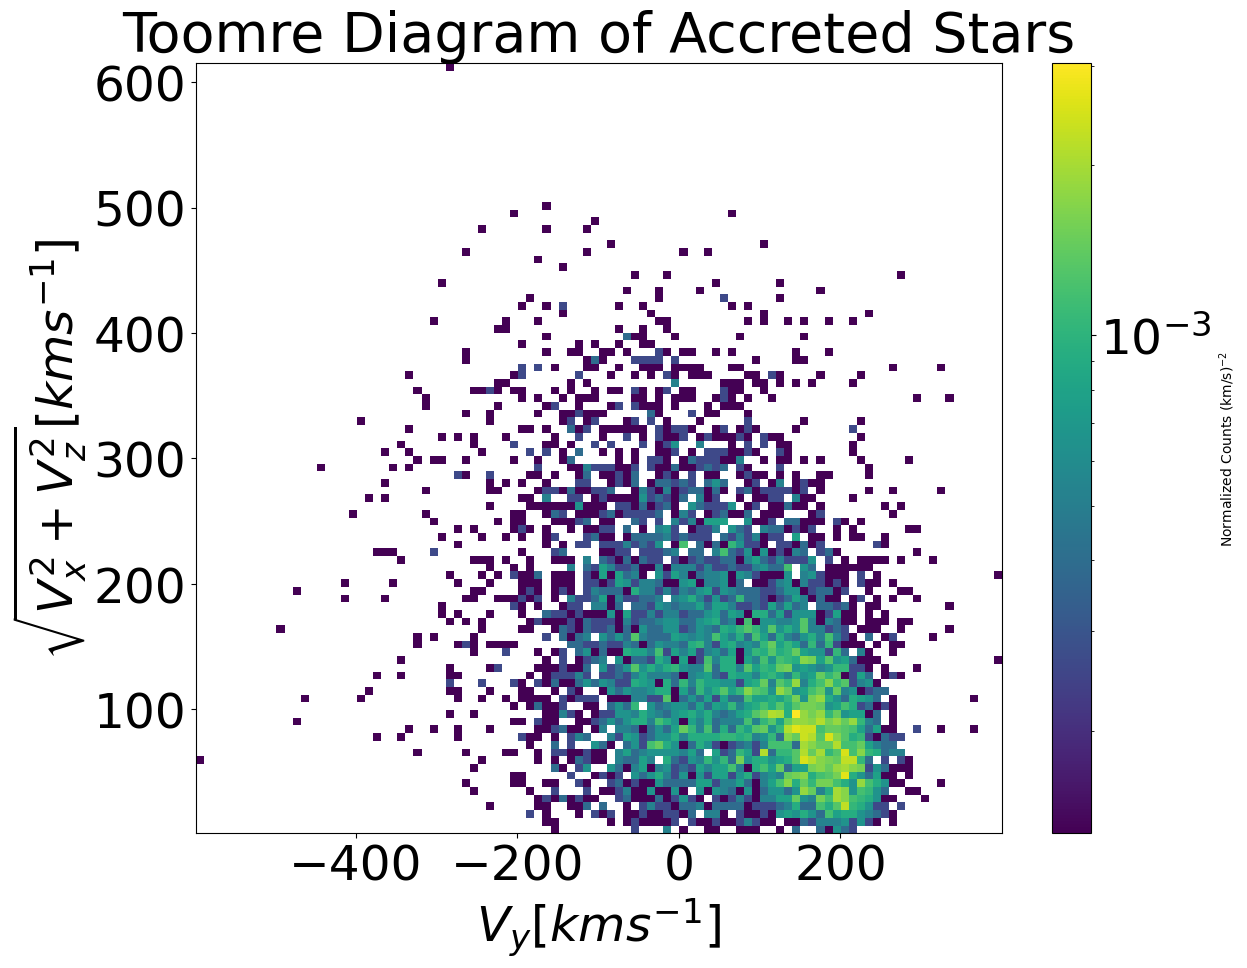

In [71]:
fig, ax = plt.subplots(1, figsize=(13, 10))

h = ax.hist2d(vy, vr, bins=100, weights=np.repeat(1/len(vx), len(vx)), norm=mpl.colors.LogNorm())
ax.set_xlabel(r'$V_y [km s^{-1}]$', fontsize=35)
ax.set_ylabel(r'$\sqrt{V_x^2+V_z^2} [km s^{-1}]$', fontsize=35)
ax.set_title('Toomre Diagram of Accreted Stars', fontsize=40)
cb = fig.colorbar(h[3], ax=ax, label=r'Normalized Counts (km/s)$^{-2}$') 
cb.ax.tick_params(labelsize=35)
ax.tick_params(axis='both', labelsize=35)

In [74]:
len(vy)

7594